In [ ]:
# Business Problem :- 

#FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports).
##Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Explore football skills and cluster football players based on their attributes.

Task3:- Explore the data and attempt all the below asked questions in a
step by step manner:

 a) Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

   b)   Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

 c)     Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 



In [ ]:
# Importing Important Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading file
data = pd.read_csv('/content/players_20.csv')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
###From the above line we interpret  the data types of our features.

##data types: float64(16), int64(45), object(43)

## We must note that for training model the model we have to convert object datatype column to Numeric datatype

In [ ]:
data.shape

(18278, 104)

In [ ]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

### * The Youngest Players are of age 16 years old and Oldest Players are of age 42.
### * The Potential of players lies withing the range of 49-95.
### * Looking at the minimum and maximum values of each numerical features, it is concluded that there are no outliers in this data. The exceptional values in the data will be handled while performing Robust scaling which uses the interquartile range

In [ ]:
# Some information about object dataype columns
data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,1499,18038,1048,16990,1126,7566,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,2,83,29,316,1760,26,921,94,94,94,107,103,103,103,107,103,103,103,100,88,88,88,100,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,No,#Strength,SUB,Sassuolo,2019-07-01,SUB,Early Crosser,61+2,61+2,61+2,63+2,63+2,63+2,63+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,16310,514,7820,17,1465,587,501,725,725,725,736,727,727,727,736,748,748,748,809,775,775,775,809,682,636,636,636,682,667,621,621,621,667


In [ ]:
### From column player_tags to column rb missing values are present 
### we have to treat the missing value either by dropping the column or by replacing missing value with central tendency.

In [ ]:
# For full check
a= data.isnull().sum().sort_values(ascending=False)
print(a.to_string())

loaned_from                   17230
nation_position               17152
nation_jersey_number          17152
player_tags                   16779
gk_speed                      16242
gk_diving                     16242
gk_handling                   16242
gk_reflexes                   16242
gk_kicking                    16242
gk_positioning                16242
player_traits                 10712
lf                             2036
lw                             2036
rs                             2036
physic                         2036
defending                      2036
dribbling                      2036
passing                        2036
shooting                       2036
st                             2036
ls                             2036
rb                             2036
pace                           2036
rdm                            2036
rwb                            2036
ldm                            2036
lwb                            2036
rm                          

In [ ]:
# For full check
percentage_missing_value= (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
print(percentage_missing_value.to_string())

loaned_from                   94.266331
nation_position               93.839589
nation_jersey_number          93.839589
player_tags                   91.798884
gk_speed                      88.860926
gk_diving                     88.860926
gk_handling                   88.860926
gk_reflexes                   88.860926
gk_kicking                    88.860926
gk_positioning                88.860926
player_traits                 58.605974
lf                            11.139074
lw                            11.139074
rs                            11.139074
physic                        11.139074
defending                     11.139074
dribbling                     11.139074
passing                       11.139074
shooting                      11.139074
st                            11.139074
ls                            11.139074
rb                            11.139074
pace                          11.139074
rdm                           11.139074
rwb                           11.139074


In [ ]:
data.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

###### we have data types: float64(16), int64(45), object(43)

### Here We are dealing with only fieldplayers columns

In [ ]:
df = data.drop(data.index[(data["team_position"] == "GK")],axis=0)

In [ ]:
## Data cleaning :- Removing some redundant features 
unimp_columns = ['sofifa_id', 'player_url', 'short_name', 'long_name','dob','nationality', 'club', 'overall',
'player_positions','international_reputation','work_rate', 'body_type', 'real_face',
 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits','release_clause_eur',
        'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning','goalkeeping_reflexes']
data_final = df.drop(unimp_columns, axis = 1) # dataset without goal keeper columns

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   potential                   18278 non-null  int64  
 4   value_eur                   18278 non-null  int64  
 5   wage_eur                    18278 non-null  int64  
 6   preferred_foot              18278 non-null  object 
 7   weak_foot                   18278 non-null  int64  
 8   skill_moves                 18278 non-null  int64  
 9   pace                        16242 non-null  float64
 10  shooting                    16242 non-null  float64
 11  passing                     16242 non-null  float64
 12  dribbling                   16242 non-null  float64
 13  defending                   162

In [ ]:
columns =['ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']
for i in columns:
    data_final[i]=data_final[i].str.split('+',n=1,expand = True)[0]


In [ ]:
data_final

,age,height_cm,weight_kg,potential,value_eur,wage_eur,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,95500000,565000,Left,4,4,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,34,187,83,93,58500000,405000,Right,4,5,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,27,175,68,92,105500000,290000,Right,5,5,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,26,188,87,93,77500000,125000,Right,3,1,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,175,74,91,90000000,470000,Right,4,4,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,56,40000,2000,Right,3,2,57.0,23.0,28.0,33.0,47.0,51.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,32,32,32,31,31,31,31,31,31,31,31,33,33,33,33,33,43,42,42,42,43,45,46,46,46,45
18274,22,177,66,56,40000,2000,Right,2,2,58.0,24.0,33.0,35.0,48.0,48.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,33,33,33,33,32,32,32,33,33,33,33,35,36,36,36,35,44,43,43,43,44,46,47,47,47,46
18275,19,186,75,56,40000,1000,Right,2,2,54.0,35.0,44.0,45.0,48.0,51.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,43,43,43,43,43,43,43,43,44,44,44,45,46,46,46,45,47,49,49,49,47,47,49,49,49,47
18276,18,185,74,54,40000,1000,Right,2,2,59.0,35.0,47.0,47.0,45.0,52.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,43,43,43,45,44,44,44,45,46,46,46,46,46,46,46,46,48,48,48,48,48,48,49,49,49,48


In [ ]:
# For full check
percentage_missing_value= (data_final.isnull().sum()/len(data_final)*100).sort_values(ascending=False)
print(percentage_missing_value.to_string())

rb                            7.799728
rm                            7.799728
ls                            7.799728
st                            7.799728
rs                            7.799728
lw                            7.799728
lf                            7.799728
cf                            7.799728
rf                            7.799728
rw                            7.799728
lam                           7.799728
cam                           7.799728
ram                           7.799728
lm                            7.799728
lcm                           7.799728
rcm                           7.799728
cm                            7.799728
lwb                           7.799728
cdm                           7.799728
rcb                           7.799728
cb                            7.799728
lcb                           7.799728
lb                            7.799728
rwb                           7.799728
ldm                           7.799728
rdm                      

In [ ]:
# To get only Numerical Column
num_col = data_final.select_dtypes(exclude=['object'])
num_col.head(1)

,age,height_cm,weight_kg,potential,value_eur,wage_eur,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,32,170,72,94,95500000,565000,4,4,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26


In [ ]:
num_col.shape

(17616, 43)

In [ ]:
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
age,17616.0,2.516218e+01,4.614123e+00,16.0,21.0,25.0,28.0,42.0
height_cm,17616.0,1.810869e+02,6.676533e+00,156.0,176.0,181.0,186.0,203.0
weight_kg,17616.0,7.498496e+01,6.918286e+00,50.0,70.0,75.0,80.0,110.0
potential,17616.0,7.149915e+01,6.118018e+00,49.0,67.0,71.0,75.0,95.0
value_eur,17616.0,2.436181e+06,5.472621e+06,0.0,325000.0,700000.0,2000000.0,105500000.0
wage_eur,17616.0,9.389305e+03,2.121877e+04,0.0,1000.0,3000.0,8000.0,565000.0
weak_foot,17616.0,2.957993e+00,6.588731e-01,1.0,3.0,3.0,3.0,5.0
skill_moves,17616.0,2.419448e+00,7.309584e-01,1.0,2.0,2.0,3.0,5.0
pace,16242.0,6.770090e+01,1.129766e+01,24.0,61.0,69.0,75.0,96.0
shooting,16242.0,5.229830e+01,1.402942e+01,15.0,42.0,54.0,63.0,93.0


In [ ]:
# To get only object_datatype Column
obj_col = data_final.select_dtypes(include=['object'])
obj_col.head(1)

,preferred_foot,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,Left,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63


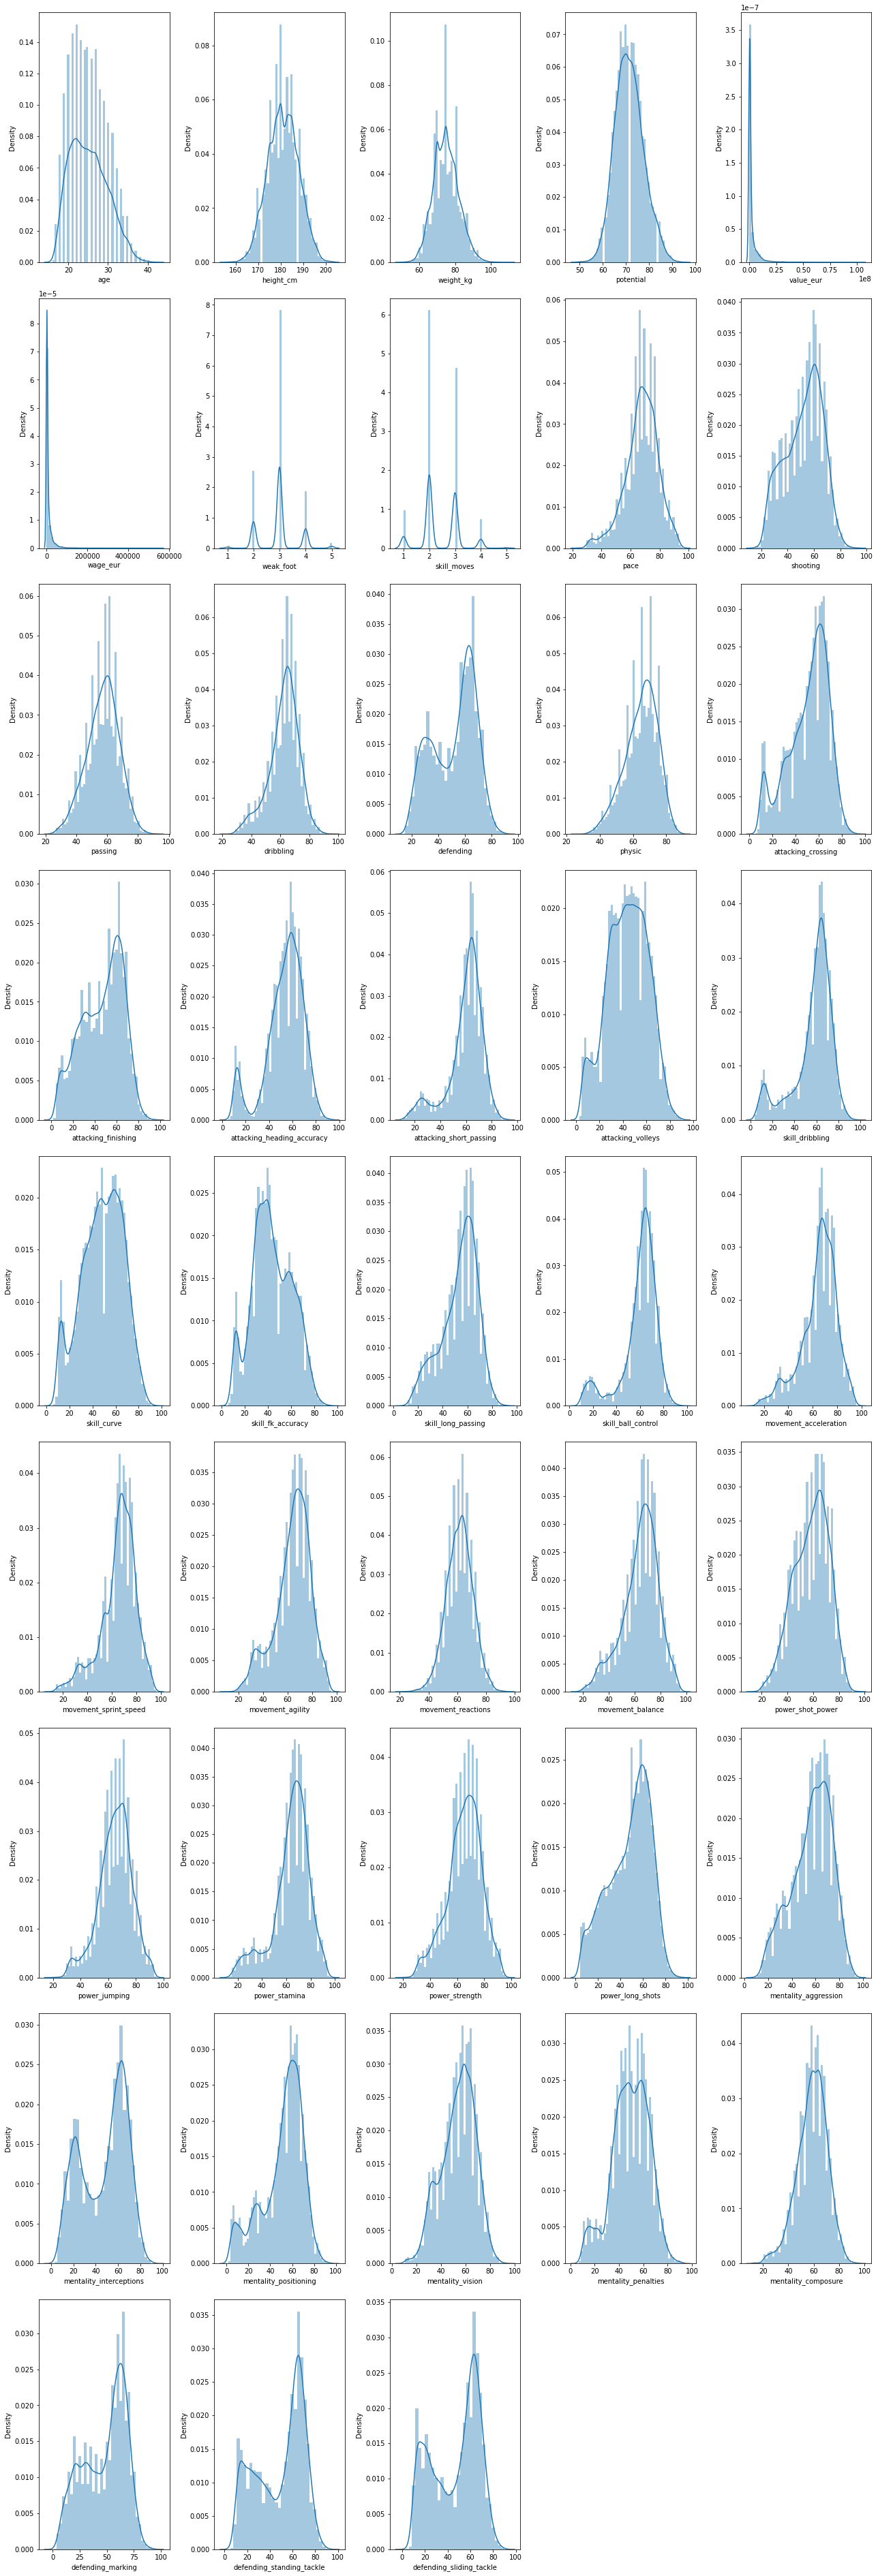

In [ ]:
# Outliers check for numeric data type columns
plt.figure(figsize=(18,58))
plotnumber =1
for column in num_col:
  plt.subplot(10,5,plotnumber)
  sns.distplot(num_col[column])
  plotnumber += 1
plt.tight_layout()

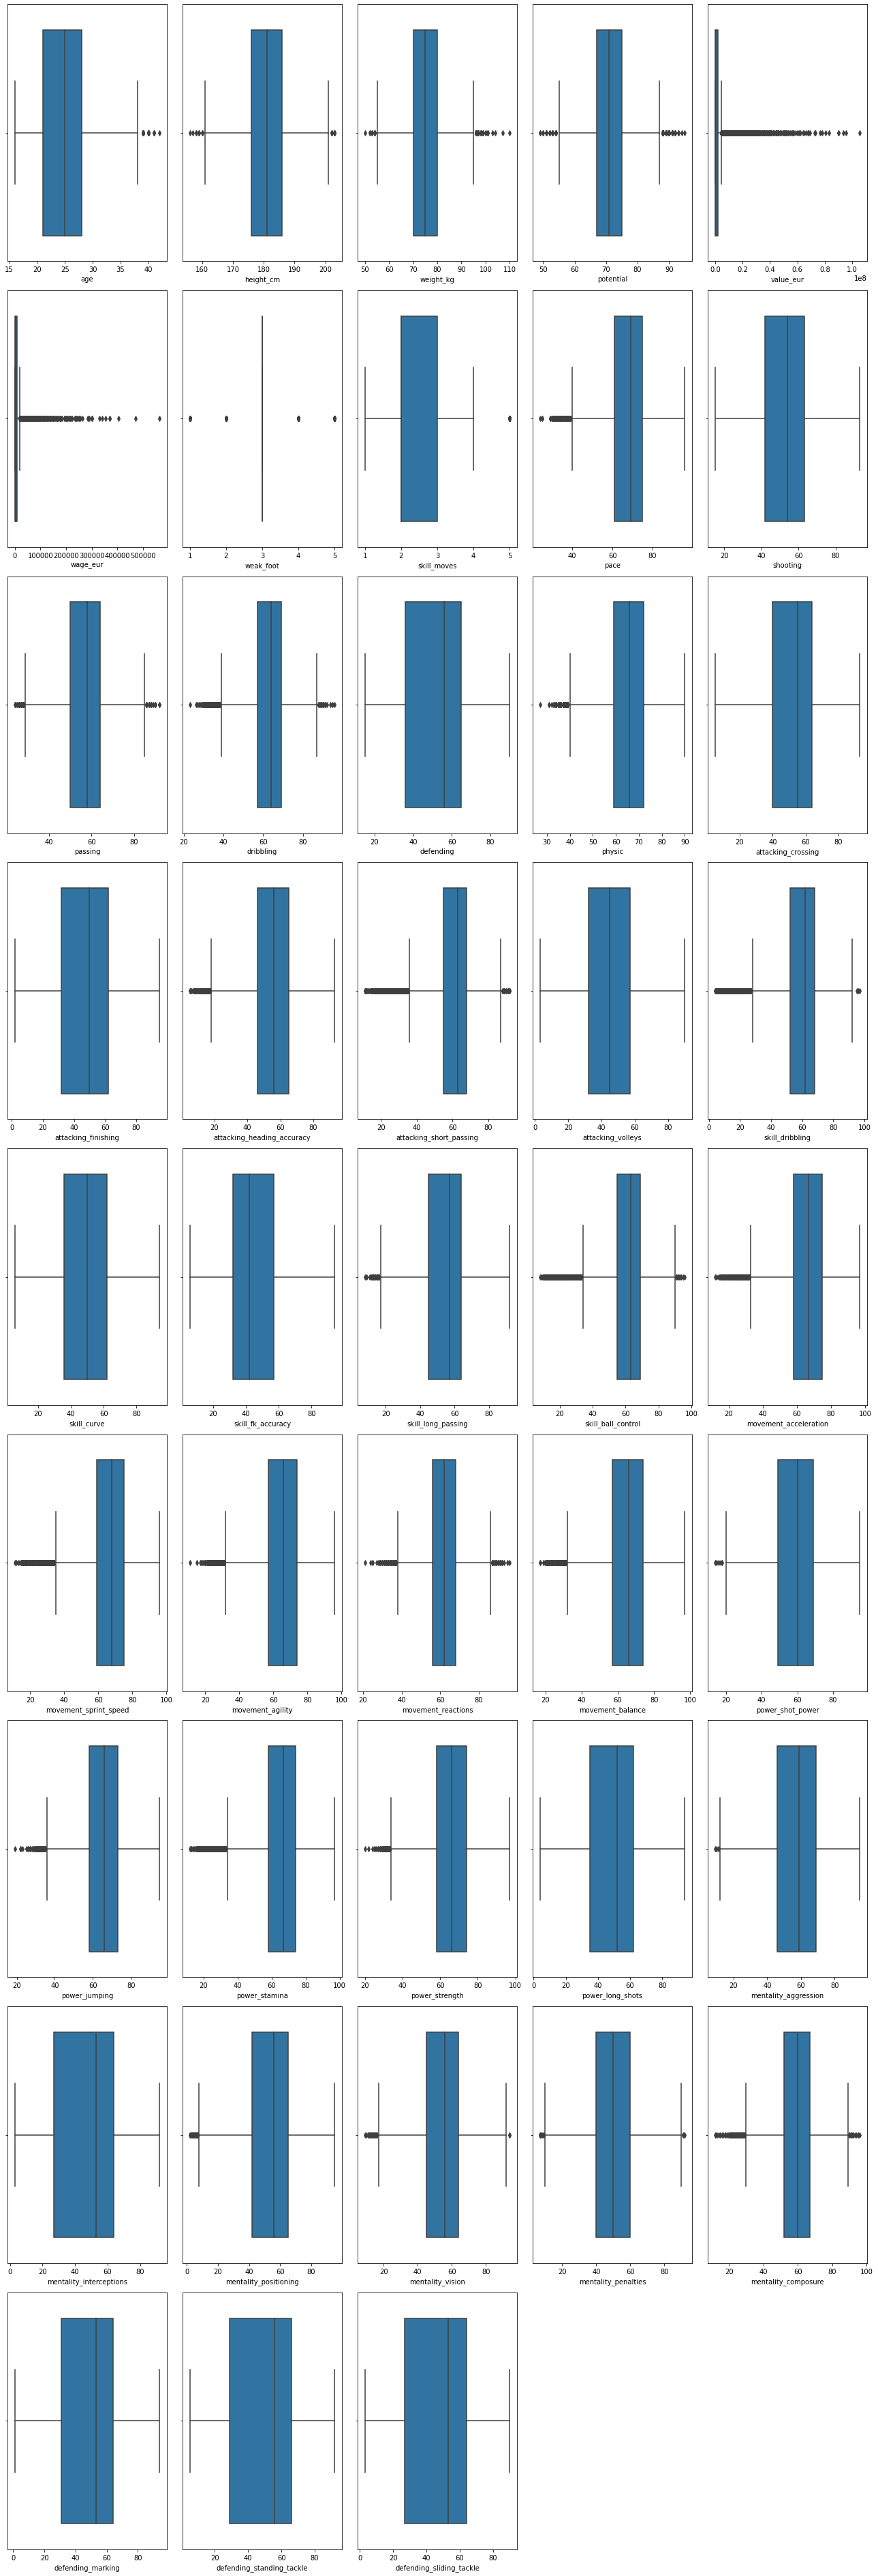

In [ ]:
# Outliers check for numeric data type columns
plt.figure(figsize=(18,58))
plotnumber =1
for column in num_col:
  plt.subplot(10,5,plotnumber)
  sns.boxplot(num_col[column])
  plotnumber += 1
plt.tight_layout()

In [ ]:
num_col['defending'].mean()

51.55350326314493

In [ ]:
num_col['defending'].median()

56.0

In [ ]:
num_col['pace'].mean()

67.70089890407586

In [ ]:
num_col['pace'].median()

69.0

 ### Data Preprocessing without outliers treatment

In [ ]:
columns =['ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']
for i in columns:
    data_final[columns] = data_final[columns].fillna(0)


* Treating Missing value

In [ ]:
columns =['ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for i in columns:
    data_final1 = data_final.fillna(data_final.median())


In [ ]:
data_final1.isnull().sum().to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
data_final1['preferred_foot'].value_counts()

Right    13384
Left      4232
Name: preferred_foot, dtype: int64

* Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_final1['preferred_foot'] = le.fit_transform(data_final1['preferred_foot'])

In [ ]:
data_final1['preferred_foot'].value_counts()

1    13384
0     4232
Name: preferred_foot, dtype: int64

In [ ]:
data_final1.columns.values

array(['age', 'height_cm', 'weight_kg', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'weak_foot', 'skill_moves', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'ca

In [ ]:
# 1 copy of data_final1
data_final2 = data_final1[['age', 'height_cm', 'weight_kg', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'weak_foot', 'skill_moves', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]

In [ ]:
data_final2.columns.values

array(['age', 'height_cm', 'weight_kg', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'weak_foot', 'skill_moves', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'ca

* Duplicasy check

In [ ]:
data_final1.duplicated().sum()

0

* Scaling 
> 1. Standard Scalling
> 2. Robust scalling

In [ ]:
# 1 Standard Scalling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_data = ss.fit_transform(data_final1)

In [ ]:
# since scaled_data in an array form so we have to convert it to dataframe for further process
dfof_ss_data = pd.DataFrame(data=ss_data,columns=data_final1.columns)

In [ ]:
dfof_ss_data.head(2)

,age,height_cm,weight_kg,potential,value_eur,wage_eur,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,1.481974,-1.660626,-0.431471,3.677905,17.005831,26.185612,-1.778362,1.581544,2.162362,1.768830,2.935711,3.472202,3.374788,-0.815922,0.110459,2.133941,2.553320,1.016238,2.353441,2.585802,2.277771,2.521492,2.979042,2.62107,2.351747,1.780157,1.307717,1.998385,3.653991,2.206564,2.047298,0.244387,0.725925,0.213115,2.477918,-0.528273,-0.364292,2.298112,2.899723,1.705160,3.170573,-0.768163,-0.566416,-1.004494,2.000061,2.000061,2.000061,2.087408,2.112281,2.112281,2.112281,2.087408,2.096752,2.096752,2.096752,2.014922,1.875267,1.875267,1.875267,2.014922,0.853623,0.757640,0.757640,0.757640,0.853623,0.604824,0.045555,0.045555,0.045555,0.604824
1,1.915439,0.885678,1.158563,3.514449,10.244710,18.644904,0.562315,1.581544,3.530468,2.045241,3.009903,2.471754,2.666519,-1.068914,1.390275,1.903049,2.500323,2.196294,1.694380,2.527144,1.820772,1.841063,1.912022,1.59417,2.091534,1.642418,1.796105,1.581335,3.763469,0.465026,2.717372,2.506713,1.387656,1.007492,2.423976,0.371721,-0.903497,2.352176,2.028860,2.371299,3.085154,-1.024246,-0.804715,-1.101142,2.112201,2.112201,2.112201,1.870662,1.948994,1.948994,1.948994,1.870662,1.824838,1.824838,1.824838,1.796478,1.537382,1.537382,1.537382,1.796478,0.683809,0.480959,0.480959,0.480959,0.683809,0.492276,0.099070,0.099070,0.099070,0.492276


In [ ]:
# 2 Robust Scalling
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs_data = ss.fit_transform(data_final2)

In [ ]:
# since scaled_data in an array form so we have to convert it to dataframe for further process
dfof_rs_data = pd.DataFrame(data=rs_data,columns=data_final2.columns)

In [ ]:
dfof_rs_data.head(2)

,age,height_cm,weight_kg,potential,value_eur,wage_eur,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,1.481974,-1.660626,-0.431471,3.677905,17.005831,26.185612,-1.778362,1.581544,2.162362,1.768830,2.935711,3.472202,3.374788,-0.815922,0.110459,2.133941,2.553320,1.016238,2.353441,2.585802,2.277771,2.521492,2.979042,2.62107,2.351747,1.780157,1.307717,1.998385,3.653991,2.206564,2.047298,0.244387,0.725925,0.213115,2.477918,-0.528273,-0.364292,2.298112,2.899723,1.705160,3.170573,-0.768163,-0.566416,-1.004494,2.000061,2.000061,2.000061,2.087408,2.112281,2.112281,2.112281,2.087408,2.096752,2.096752,2.096752,2.014922,1.875267,1.875267,1.875267,2.014922,0.853623,0.757640,0.757640,0.757640,0.853623,0.604824,0.045555,0.045555,0.045555,0.604824
1,1.915439,0.885678,1.158563,3.514449,10.244710,18.644904,0.562315,1.581544,3.530468,2.045241,3.009903,2.471754,2.666519,-1.068914,1.390275,1.903049,2.500323,2.196294,1.694380,2.527144,1.820772,1.841063,1.912022,1.59417,2.091534,1.642418,1.796105,1.581335,3.763469,0.465026,2.717372,2.506713,1.387656,1.007492,2.423976,0.371721,-0.903497,2.352176,2.028860,2.371299,3.085154,-1.024246,-0.804715,-1.101142,2.112201,2.112201,2.112201,1.870662,1.948994,1.948994,1.948994,1.870662,1.824838,1.824838,1.824838,1.796478,1.537382,1.537382,1.537382,1.796478,0.683809,0.480959,0.480959,0.480959,0.683809,0.492276,0.099070,0.099070,0.099070,0.492276


### Feature Engineering 

In [ ]:
dfof_rs_data.columns.values

array(['age', 'height_cm', 'weight_kg', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'weak_foot', 'skill_moves', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'ca

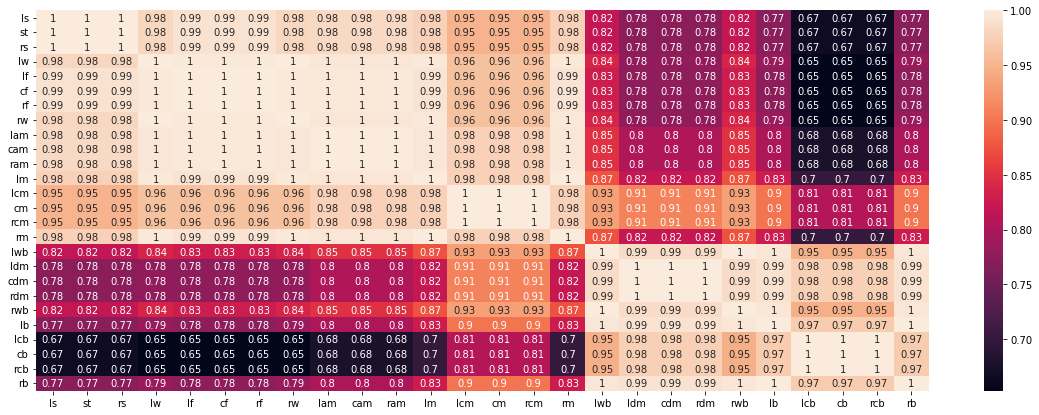

In [ ]:
positional_skill_column = [ 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
plt.figure(figsize=(20,7))
sns.heatmap(dfof_rs_data[positional_skill_column].corr(),annot=True)

* From above graph we can see that positional skill 'ls', 'st', 'rs', 'lw', 'lf', 'cf','rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm' are highly positively correlated so we can only take one of the positional skill column for our further study.
* And positional skill 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb' are highlty positive correlated. So can only consider one of the positional skill column for our further study.

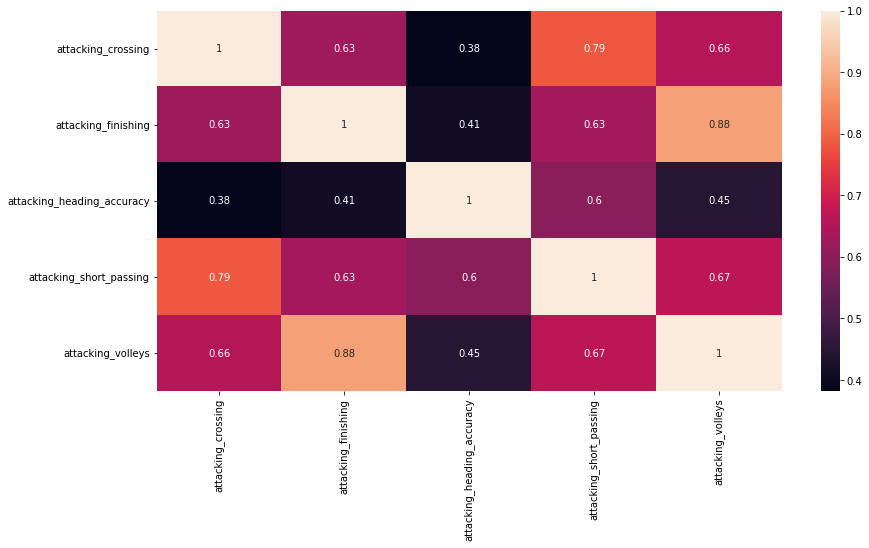

In [ ]:
attacking_skill_column = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys']
plt.figure(figsize=(14,7))
sns.heatmap(dfof_rs_data[attacking_skill_column].corr(),annot=True)   

* No high correlation among attacking skills of players so we take all of them for further study.

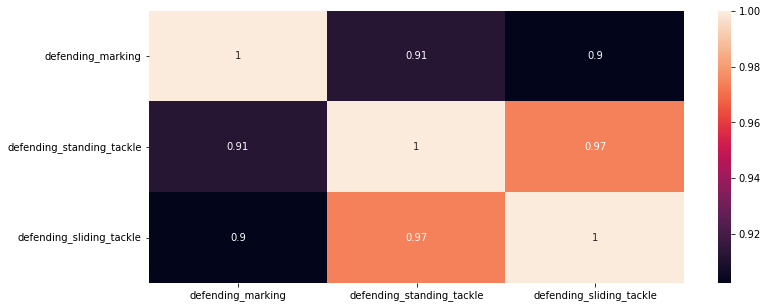

In [ ]:
defending_skill_column = ['defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle']
plt.figure(figsize=(12,5))
sns.heatmap(dfof_rs_data[defending_skill_column].corr(),annot=True)   

* defending_standing_tackle and defending_sliding_tackle are showing high positvie (0.97) correlation so we can drop one of them .

In [ ]:
dfof_rs_data = dfof_rs_data.drop(['st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
       'lwb', 'ldm','rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','defending_sliding_tackle'],axis=1)

In [ ]:
dfof_ss_data = dfof_ss_data.drop(['st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
       'lwb', 'ldm','rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','defending_sliding_tackle'],axis=1)

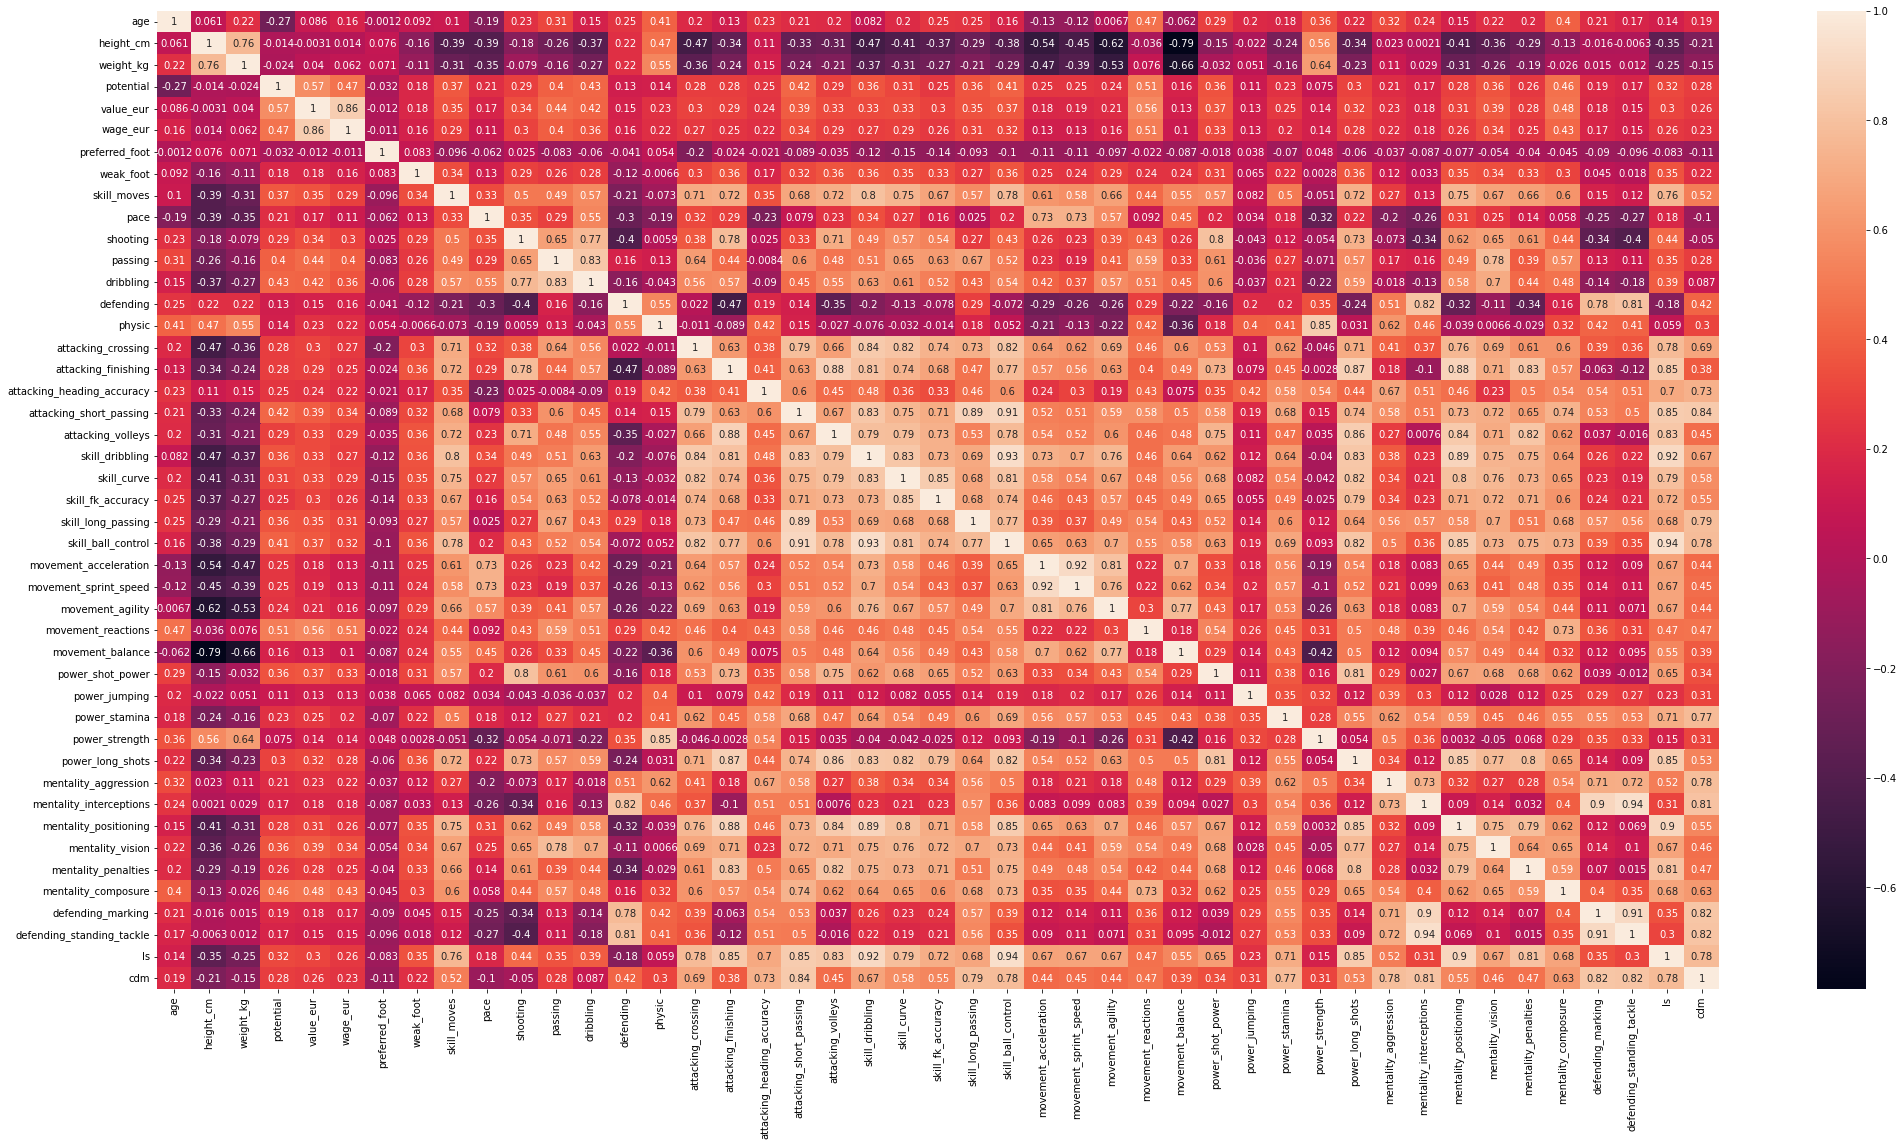

In [ ]:
plt.figure(figsize=(35,18))
sns.heatmap(dfof_rs_data.corr(),annot=True)   

* Now No Highly correlated columns in dataset.

In [ ]:
dfof_rs_data.shape

(17616, 45)